In [2]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()
data, target = iris.data, iris.target
x, y = data[target!=2], target[target!=2]
y[y==0]=-1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.2)

In [5]:
pls = PLSRegression(n_components=2, scale=False)
pls.fit(X_train, y_train)
T = pls.x_scores_

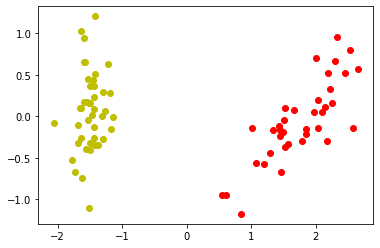

In [6]:
plt.plot(T[y_train!=1,0],T[y_train!=1,1], 'yo')
plt.plot(T[y_train==1,0],T[y_train==1,1], 'ro')

In [7]:
xavg = X_train.mean(axis=0)
X_test -= xavg
Tpred = None
for i in range(2):
    t = X_test.dot(pls.x_weights_[:,i])
    if Tpred is None:
        Tpred = t
    else:
        Tpred = np.c_[Tpred, t]
    X_test -= np.outer(t, pls.x_loadings_[:,i])

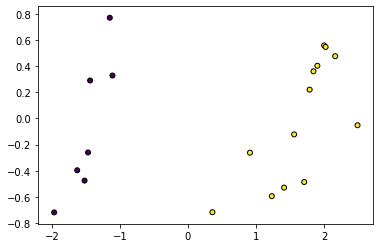

In [8]:
plt.scatter(Tpred[:,0],Tpred[:,1],c=y_test,edgecolors='black', s=25)
plt.show()